In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\elham\Desktop\IT\ML\insurance_data.csv')

In [3]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


In [9]:
x=df['age']
y=df['bought_insurance']




0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64


In [37]:
x1=df.iloc[:,0].values.reshape(-1, 1)  # Convert to NumPy and reshape to 2D
x=df.iloc[:,0]
y1=df.iloc[:,1].to_numpy()

  # Convert to NumPy (1D is fine for y)
print(x1.shape)
print(x.shape)



(27, 1)
(27,)


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,train_size=0.8)
print(x_train)

print("the shape is:",x_train.shape)

[[25]
 [19]
 [52]
 [18]
 [28]
 [26]
 [25]
 [23]
 [45]
 [46]
 [55]
 [50]
 [61]
 [58]
 [62]
 [18]
 [60]
 [27]
 [49]
 [22]
 [56]]
the shape is: (21, 1)


In [39]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [49]:
y_predicted=model.predict(x_test)


In [50]:
model.predict_proba(x_test)

array([[0.78898748, 0.21101252],
       [0.40841023, 0.59158977],
       [0.07442288, 0.92557712],
       [0.92740328, 0.07259672],
       [0.19068002, 0.80931998],
       [0.06451101, 0.93548899]])

In [51]:
accuracy=model.score(x_test,y_test)
print(accuracy)

0.8333333333333334


In [52]:
model.coef_

array([[0.15357948]])

In [53]:
model.intercept_

array([-5.77263785])

In [58]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)


Text(33.22222222222222, 0.5, 'truth')

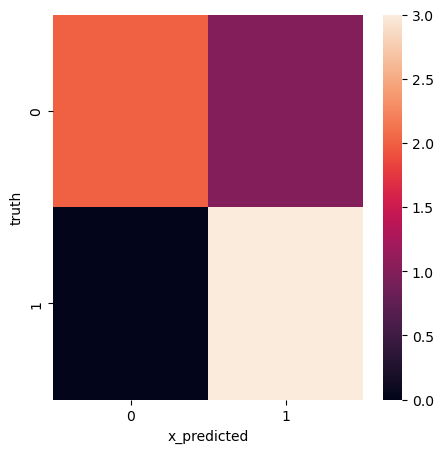

In [65]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm)
plt.xlabel('x_predicted')
plt.ylabel('truth')



In [156]:

df2 = pd.read_csv(r'C:\Users\elham\Desktop\IT\ML\titanic3.csv')
df2.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [157]:
df2.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [158]:


df3=df2.drop(['pclass', 'name',  'sibsp', 'parch', 'ticket',
      'embarked', 'boat', 'body', 'home.dest'],axis=1)
df3.head()

,survived,sex,age,fare,cabin
0,1.0,female,29.0000,211.3375,B5
1,1.0,male,0.9167,151.5500,C22 C26
2,0.0,female,2.0000,151.5500,C22 C26
3,0.0,male,30.0000,151.5500,C22 C26
4,0.0,female,25.0000,151.5500,C22 C26


In [159]:
df3=df3.dropna()
df4=pd.get_dummies(df3,columns=['sex' , 'cabin'],drop_first=True)
df4.head(2)

,survived,age,fare,sex_male,cabin_A11,cabin_A16,cabin_A18,cabin_A20,cabin_A21,cabin_A23,...,cabin_E8,cabin_F,cabin_F E57,cabin_F G63,cabin_F G73,cabin_F2,cabin_F33,cabin_F4,cabin_G6,cabin_T
0,1.0,29.0000,211.3375,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.0,0.9167,151.5500,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [160]:
y=df4.iloc[:,0]
x=df4.iloc[:,1:]

In [162]:
x.columns

Index(['age', 'fare', 'sex_male', 'cabin_A11', 'cabin_A16', 'cabin_A18',
       'cabin_A20', 'cabin_A21', 'cabin_A23', 'cabin_A24',
       ...
       'cabin_E8', 'cabin_F', 'cabin_F E57', 'cabin_F G63', 'cabin_F G73',
       'cabin_F2', 'cabin_F33', 'cabin_F4', 'cabin_G6', 'cabin_T'],
      dtype='object', length=176)

In [163]:
x.shape

(272, 176)

In [164]:
y.shape

(272,)

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)
y_train.shape


(217,)

In [171]:
x_train.shape

(217, 176)

In [172]:
model1=LogisticRegression()
model1.fit(x_train,y_train)


C:\Users\elham\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [213]:
df8=df2.drop_duplicates()
print(df2.isnull().sum()) 
df8.info()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null

In [214]:
x3=df8[['age','fare']]
x3.shape

(1310, 2)

In [215]:
y3=df8.iloc[:,0]
print(y3.shape)
print(y3.unique())

(1310,)
[ 1.  2.  3. nan]


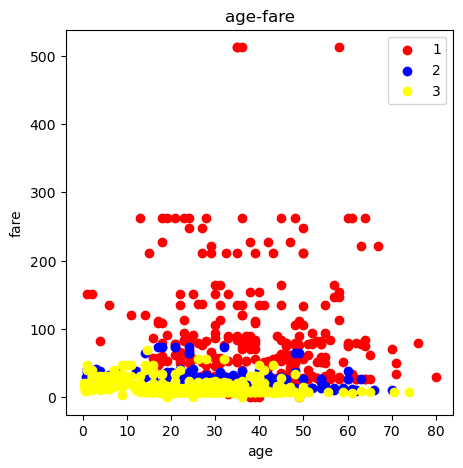

In [217]:
plt.figure(figsize=(5,5))

plt.scatter(x3[y3 == 1].iloc[:, 0], x3[y3 == 1].iloc[:, 1], c='red', label='1')
plt.scatter(x3[y3 == 2].iloc[:, 0], x3[y3 == 2].iloc[:, 1], c='blue', label='2')
plt.scatter(x3[y3 == 3]['age'], x3[y3 == 3].iloc[:, 1], c='yellow', label='3')
plt.xlabel('age')
plt.ylabel('fare')
plt.title('age-fare')
plt.legend()